# Computer Vision | MNIST Fashion data Classification using CNN

## Importing dataset

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.datasets import fashion_mnist 

In [37]:
(xtrain,ytrain), (xtest,ytest)=fashion_mnist.load_data()

## Data exploration

### Checking shapes of data

In [6]:
ytrain[0]

9

In [21]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [24]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

### Plotting a sample

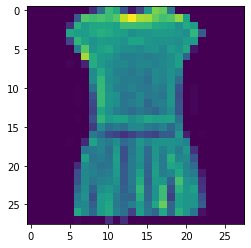

In [8]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[3])

Creating a small list so we can index onto our training labels so they're human readable

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### Plotting some random samples

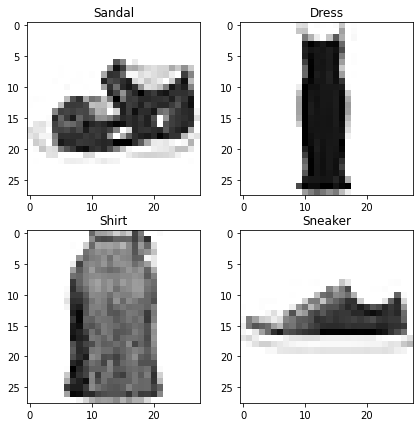

In [10]:
import random
plt.figure(figsize=(7,7))

for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand=random.choice(range(len(xtrain)))
    plt.imshow(xtrain[rand],cmap=plt.cm.binary)
    plt.title(class_names[ytrain[rand]])

## Preprocessing

### Normalizing the data

Here we are normalizing the data by diving it by its max value to reduce the data between 0 & 1

In [11]:
xtrain_norm=xtrain/255.0
xtest_norm=xtest/255.0

### Reshaping the data

Since I'll be using Conv2D layer I'm creating an extra dimension to match the input shape

In [ ]:
xtrain_norm=xtrain_norm.reshape((60000,28,28,1))

In [25]:
xtest_norm=xtest_norm.reshape(10000,28,28,1)

### Converting data into tensors

In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain_norm, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest_norm, ytest))

### Creating batches and shuffling the data

In [39]:
batch_size= 32
shuffle_buffer = 100

train_dataset = train_dataset.shuffle(shuffle_buffer).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

## Modelling

In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,1,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(10,3,1,activation='relu'),
    tf.keras.layers.MaxPool2D(2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,1,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [41]:
history=model.fit(train_dataset,
                  epochs=10,
                  validation_data=test_dataset)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5098 - accuracy: 0.8152 - val_loss: 0.4121 - val_accuracy: 0.8543
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3575 - accuracy: 0.8713 - val_loss: 0.3611 - val_accuracy: 0.8743
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3140 - accuracy: 0.8868 - val_loss: 0.3261 - val_accuracy: 0.8861
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2871 - accuracy: 0.8967 - val_loss: 0.3081 - val_accuracy: 0.8886
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2672 - accuracy: 0.9040 - val_loss: 0.2986 - val_accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2528 - accuracy: 0.9098 - val_loss: 0.2864 - val_accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2416 - accuracy: 0.9133 - val_loss: 0.2881 -

## Evaluation

### Checking the loss curve

In [45]:
import pandas as pd

<AxesSubplot:>

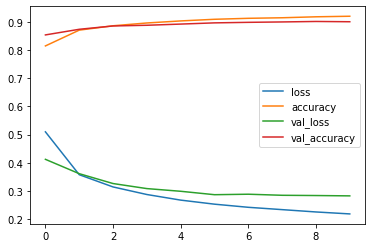

In [46]:
pd.DataFrame(history.history).plot()

### Creating a pretty confusion matrix

In [50]:
y_prob=model.predict(test_dataset)

313/313 [==============================] - 2s 6ms/step


In [51]:
pred=y_prob.argmax(axis=1)

In [54]:
##This function makes the pretty confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(6,6),text_size=13):
#create confusion matrix

    cm=confusion_matrix(y_true,y_pred)
    cm_norm= cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]
    #let's prettify it

    fig,ax=plt.subplots(figsize=figsize)

    #create a matrix plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
    if classes:
        label=classes
    else:
        label=np.arange(cm.shape[0])

    #label the axis
    ax.set(title='Confusion Matrix',
          xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=label,
          yticklabels=label)

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold=(cm.max()+cm.min())/2

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%))',
                 horizontalalignment='center',
                 color='white' if cm[i,j]>threshold else 'black',
                 size=text_size)

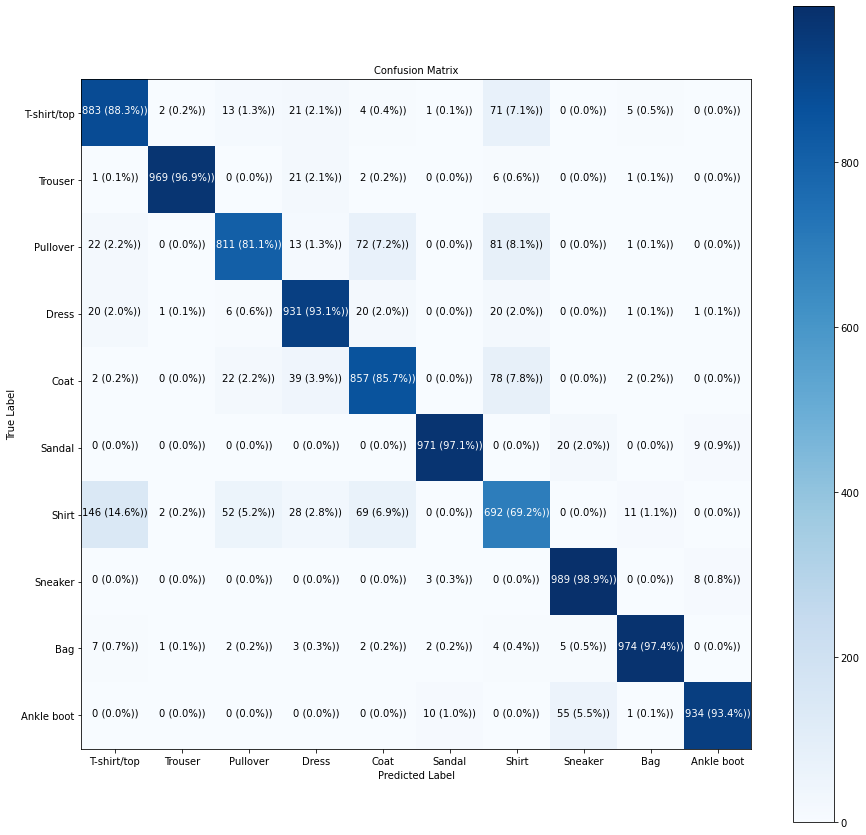

In [55]:
make_confusion_matrix(ytest,pred,figsize=(15,15),text_size=10,classes=class_names)

### Plotting random images with labels and predictions

In [56]:
import random
def plot_random_image(model,image,true_label,classes):
    plt.figure(figsize=(8,8))
    for j in range(4):
        plt.subplot(2,2,j+1)
        '''Picks a random image, plots it and labels it with a prediction and truth label'''
        i=random.randint(0,len(image))

        #create predicitons and targets
        target_image=image[i]
        pred_prob=model.predict(target_image.reshape(1,28,28))
        pred_label=classes[pred_prob.argmax()]
        label=classes[true_label[i]]

        plt.imshow(target_image,cmap=plt.cm.binary)

        #change the color of the titles depending on if the predicition is right
        #or wrong
        if pred_label==label:
            color='green'
        else:
            color='red'

        #add xlabel info
        plt.xlabel('pred {} {:2.0f}% (True: {})'.format(pred_label,
                                                        100*tf.reduce_max(pred_prob),
                                                        label),

                   color=color)

1/1 [==============================] - 0s 54ms/step


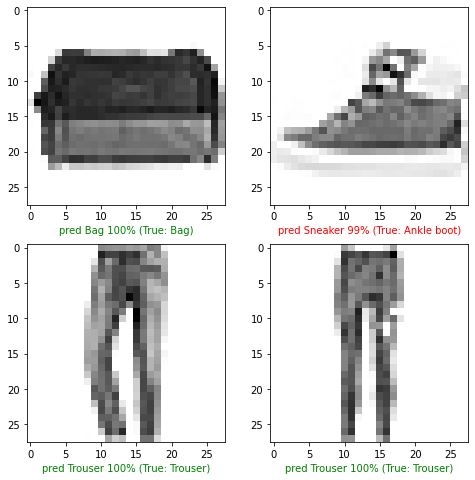

In [57]:
plot_random_image(model,xtest_norm,ytest,class_names)